In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
netflix_df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv")

In [8]:
netflix_df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [60]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [29]:
# Count of Movies and TV Shows
count = netflix_df['type'].value_counts()
count

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [27]:
# Percentage of Movies and TV Shows
count_pct = netflix_df['type'].value_counts(normalize=True)
count_pct

Movie      0.696151
TV Show    0.303849
Name: type, dtype: float64

In [48]:
# Movies & TV Shows count by Country
cat_cols = ['country', 'type']
count_by_country = netflix_df[cat_cols].value_counts()
count_by_country

country                                                                         type   
United States                                                                   Movie      2058
India                                                                           Movie       893
United States                                                                   TV Show     760
United Kingdom                                                                  TV Show     213
                                                                                Movie       206
                                                                                           ... 
Ireland, Canada                                                                 Movie         1
Ireland, Canada, Luxembourg, United States, United Kingdom, Philippines, India  Movie         1
Ireland, Canada, United Kingdom, United States                                  Movie         1
Ireland, Canada, United States, United Kingdom  

In [56]:
# Movies & TV Shows by Country by duration
cat_cols_duration = ['country', 'type', 'duration']
country_type_duration = netflix_df[cat_cols_duration]
country_type_duration

,country,type,duration
0,United States,Movie,90 min
1,South Africa,TV Show,2 Seasons
2,NaN,TV Show,1 Season
3,NaN,TV Show,1 Season
4,India,TV Show,2 Seasons
...,...,...,...
8802,United States,Movie,158 min
8803,NaN,TV Show,2 Seasons
8804,United States,Movie,88 min
8805,United States,Movie,88 min


In [26]:
null_count = netflix_df.isnull().sum()
null_count

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [55]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [59]:
# sort values by rating & duration
netflix_df.sort_values(['rating', 'duration'], ascending=False)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8790,s8791,Movie,You Don't Mess with the Zohan,Dennis Dugan,"Adam Sandler, John Turturro, Emmanuelle Chriqu...",United States,"September 1, 2019",2008,UR,113 min,"Action & Adventure, Comedies",An Israeli counterterrorism soldier with a sec...
7058,s7059,Movie,Immoral Tales,Walerian Borowczyk,"Lise Danvers, Fabrice Luchini, Charlotte Alexa...",France,"June 6, 2019",1974,UR,103 min,"Dramas, International Movies, Romantic Movies",This anthology illustrates the timeless nature...
7988,s7989,Movie,Sex Doll,Sylvie Verheyde,"Hafsia Herzi, Ash Stymest, Karole Rocher, Paul...","United Kingdom, France","July 10, 2017",2016,UR,103 min,"Dramas, International Movies, Romantic Movies",A high-end call girl falls for a handsome man ...
7292,s7293,Movie,Leo the Lion,Mario Cambi,"Daniel Amerman, John Cygan, Matthew Mercer, Am...","United States, Italy","December 20, 2015",2013,TV-Y7-FV,78 min,"Children & Family Movies, Comedies",Eschewing the carnivorous ways of his fellow l...
7317,s7318,Movie,Little Singham aur Kaal ka Mahajaal,Prakash Satam,NaN,NaN,"December 1, 2018",2018,TV-Y7-FV,68 min,"Children & Family Movies, Comedies","When Kaal, the vilest demon on earth, threaten..."
...,...,...,...,...,...,...,...,...,...,...,...,...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [4]:
ndf = netflix_df.copy()
ndf.loc[ndf['type']=='Movie', ['country']]

,country
0,United States
6,NaN
7,"United States, Ghana, Burkina Faso, United Kin..."
9,United States
12,"Germany, Czech Republic"
...,...
8801,"United Arab Emirates, Jordan"
8802,United States
8804,United States
8805,United States


In [112]:
# List of movies & TV Shows for United States
US_List = ndf.loc[ndf['country']=='United States',["type","title","director"]]
US_List

,type,title,director
0,Movie,Dick Johnson Is Dead,Kirsten Johnson
9,Movie,The Starling,Theodore Melfi
15,TV Show,Dear White People,NaN
27,Movie,Grown Ups,Dennis Dugan
28,Movie,Dark Skies,Scott Stewart
...,...,...,...
8791,Movie,Young Adult,Jason Reitman
8793,Movie,"Yours, Mine and Ours",Raja Gosnell
8802,Movie,Zodiac,David Fincher
8804,Movie,Zombieland,Ruben Fleischer


In [132]:
# List of Movies & TV Shows by Actio Type
Action_List = ndf.loc[ndf['listed_in'].str.contains("Action")]
Action_List

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
11,s12,TV Show,Bangkok Breaking,Kongkiat Komesiri,"Sukollawat Kanarot, Sushar Manaying, Pavarit M...",NaN,"September 23, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","Struggling to earn a living in Bangkok, a man ..."
19,s20,TV Show,Jaguar,NaN,"Blanca Suárez, Iván Marcos, Óscar Casas, Adriá...",NaN,"September 22, 2021",2021,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...","In the 1960s, a Holocaust survivor joins a gro..."
21,s22,TV Show,Resurrection: Ertugrul,NaN,"Engin Altan Düzyatan, Serdar Gökhan, Hülya Dar...",Turkey,"September 22, 2021",2018,TV-14,5 Seasons,"International TV Shows, TV Action & Adventure,...",When a good deed unwittingly endangers his cla...
36,s37,Movie,The Stronghold,Cédric Jimenez,"Gilles Lellouche, Karim Leklou, François Civil...",NaN,"September 17, 2021",2021,TV-MA,105 min,"Action & Adventure, Dramas, International Movies","Tired of the small-time grind, three Marseille..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8766,s8767,Movie,XXx,Rob Cohen,"Vin Diesel, Asia Argento, Marton Csokas, Samue...",United States,"January 1, 2019",2002,PG-13,124 min,"Action & Adventure, Sports Movies",A notorious underground rush-seeker deemed unt...
8767,s8768,Movie,XXX: State of the Union,Lee Tamahori,"Ice Cube, Samuel L. Jackson, Willem Dafoe, Sco...",United States,"January 1, 2019",2005,PG-13,101 min,Action & Adventure,"In this action-packed follow-up to XXX, U.S. i..."
8772,s8773,Movie,Yamla Pagla Deewana 2,Sangeeth Sivan,"Dharmendra, Sunny Deol, Bobby Deol, Neha Sharm...",India,"May 1, 2017",2013,TV-14,147 min,"Action & Adventure, Comedies, International Mo...","Up to his old tricks, con man Dharam poses as ..."
8790,s8791,Movie,You Don't Mess with the Zohan,Dennis Dugan,"Adam Sandler, John Turturro, Emmanuelle Chriqu...",United States,"September 1, 2019",2008,UR,113 min,"Action & Adventure, Comedies",An Israeli counterterrorism soldier with a sec...


In [119]:
# Sorted by duration
sorted_by_duration = ndf.sort_values(['duration'], ascending=False)
sorted_by_duration

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1329,s1330,Movie,The Misadventures of Hedi and Cokeman,Julien Royal,"Hedi Bouchenafa, Nassim Lyes, Fred Testot, Jul...",France,"February 10, 2021",2021,TV-MA,99 min,"Comedies, International Movies","In Paris, two dysfunctional dealers use family..."
6278,s6279,Movie,Being AP,Anthony Wonke,Tony McCoy,United Kingdom,"August 15, 2016",2015,TV-14,99 min,"Documentaries, International Movies, Sports Mo...","With retirement staring him in the face, an al..."
952,s953,Movie,The Whole Nine Yards,Jonathan Lynn,"Bruce Willis, Matthew Perry, Rosanna Arquette,...",United States,"May 1, 2021",2000,R,99 min,"Action & Adventure, Comedies",An unhappily married dentist becomes mixed up ...
6141,s6142,Movie,American Hangman,Wilson Coneybeare,"Donald Sutherland, Vincent Kartheiser, Oliver ...",Canada,"July 30, 2019",2019,TV-MA,99 min,Thrillers,A judge’s kidnapping is streamed live on socia...
929,s930,Movie,Dead Again in Tombstone,Roel Reiné,"Danny Trejo, Jake Busey, Elysia Rotaru, Dean M...",NaN,"May 1, 2021",2017,R,99 min,"Action & Adventure, Horror Movies","At the devil's bidding, a deceased outlaw retu..."
...,...,...,...,...,...,...,...,...,...,...,...,...
6556,s6557,TV Show,Dance Academy,NaN,"Xenia Goodwin, Alicia Banit, Dena Kaplan, Isab...",Australia,"December 20, 2017",2013,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",Fifteen-year-old Tara Webster's dream of danci...
2945,s2946,TV Show,Cagaster of an Insect Cage,NaN,"Yoshimasa Hosoya, Kana Hanazawa, Natsuki Hanae...",Japan,"February 6, 2020",2020,TV-MA,1 Season,"Anime Series, International TV Shows",Thirty years after a disease that turns the in...
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...


In [10]:
ndf.loc[ndf['country']=='United States', ['type']].count()

type    2818
dtype: int64

In [11]:
ndf['country'].value_counts()

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

In [90]:
# total # of movies per year
num_of_movies = ndf['release_year'].value_counts()
num_of_movies.head(15)

2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
2010     194
2011     185
2009     152
2008     136
2006      96
Name: release_year, dtype: int64

In [35]:
# Count of Movies & TV Shows by Country
count_by_type_by_country = ndf.groupby(['type'])['country']
count_by_type_by_country.value_counts()



type     country                                 
Movie    United States                               2058
         India                                        893
         United Kingdom                               206
         Canada                                       122
         Spain                                         97
                                                     ... 
TV Show  United States, Russia                          1
         United States, Singapore                       1
         United States, Sweden                          1
         United States, United Kingdom, Australia       1
         Uruguay, Germany                               1
Name: country, Length: 847, dtype: int64

In [48]:
# Count of movies by director 
count_ofMovies_by_director = ndf.groupby(['director'])['country'].value_counts().sort_values(ascending=False)
count_ofMovies_by_director

director                   country                 
Marcus Raboy               United States               15
Jay Karas                  United States               14
Cathy Garcia-Molina        Philippines                 13
Jay Chapman                United States               12
David Dhawan               India                        9
                                                       ..
Joe Dietsch, Louie Gibson  United States                1
Joe Lynch                  France, United States        1
Joe Mantello               United States                1
Joe Menendez               United States                1
Kirby Dick                 Australia, United States     1
Name: country, Length: 4652, dtype: int64

In [54]:
# Top 10 directors by country 
count_per_director = ndf.groupby(['director', 'country'])['type'].value_counts().sort_values(ascending=False).head()
count_per_director

director             country        type 
Jay Karas            United States  Movie    14
Marcus Raboy         United States  Movie    14
Cathy Garcia-Molina  Philippines    Movie    13
Jay Chapman          United States  Movie    12
David Dhawan         India          Movie     9
Name: type, dtype: int64

In [126]:
# Top 10 directors by country 
count_per_director = ndf.groupby(['cast', 'country'])['type'].value_counts().sort_values(ascending=False).head()
count_per_director

cast                country         type   
Jeff Dunham         United States   Movie      7
David Attenborough  United Kingdom  TV Show    7
Craig Sechler       United States   Movie      6
Kevin Hart          United States   Movie      6
Samuel West         United States   Movie      5
Name: type, dtype: int64

In [88]:
# County of Movies by Date added
# Action_List = ndf.loc[ndf['listed_in'].str.contains("Action")]
Jan_List = ndf.groupby(['date_added', 'type', 'country'])['release_year'].count().sort_values(ascending=False)
Jan_List

date_added         type     country             
December 31, 2019  Movie    India                   54
January 1, 2020    Movie    United States           50
November 1, 2019   Movie    United States           49
March 1, 2018      Movie    India                   48
October 1, 2018    Movie    India                   47
                                                    ..
January 10, 2020   TV Show  India                    1
                            France                   1
                            Australia                1
                   Movie    United Kingdom           1
September 9, 2021  Movie    Spain, United States     1
Name: release_year, Length: 5369, dtype: int64

In [93]:
# Number of movies per year per country
num_ofMovies_year = ndf.groupby(['release_year', 'type', 'country'])['country'].count().sort_values(ascending=False)
num_ofMovies_year.head(20)

release_year  type     country      
2017          Movie    United States    284
2018          Movie    United States    246
2019          Movie    United States    217
2016          Movie    United States    210
2020          Movie    United States    177
              TV Show  United States    159
2019          TV Show  United States    134
2015          Movie    United States    113
2018          TV Show  United States    110
2017          Movie    India             98
2021          TV Show  United States     89
2018          Movie    India             81
2014          Movie    United States     76
2019          Movie    India             74
2016          Movie    India             72
2013          Movie    United States     71
2017          TV Show  United States     68
2012          Movie    United States     59
2020          Movie    India             59
2016          TV Show  United States     53
Name: country, dtype: int64

,title,release_year
director,,
A. L. Vijay,2,2
A. Raajdheep,1,1
A. Salaam,1,1
A.R. Murugadoss,2,2
Aadish Keluskar,1,1
...,...,...
Çagan Irmak,1,1
Ísold Uggadóttir,1,1
Óskar Thór Axelsson,1,1


In [33]:
ndf_agg=ndf.groupby(["director"])[["title","release_year"]].aggregate({"title":"count","release_year":["min","max"]})
ndf_agg

title release_year      
                    count          min   max
director                                    
A. L. Vijay             2         2016  2019
A. Raajdheep            1         2020  2020
A. Salaam               1         1975  1975
A.R. Murugadoss         2         2017  2018
Aadish Keluskar         1         2018  2018
...                   ...          ...   ...
Çagan Irmak             1         2005  2005
Ísold Uggadóttir        1         2018  2018
Óskar Thór Axelsson     1         2017  2017
Ömer Faruk Sorak        2         2004  2011
Şenol Sönmez            2         2015  2019

[4528 rows x 3 columns]

In [140]:
month_wise_list = ndf.loc[(ndf['date_added'].str.contains('November')) | (ndf['date_added'].str.contains('December')) | (ndf['date_added'].str.contains('January'))]
month_wise_list.count().sort_values(ascending=False)

show_id         2256
type            2256
title           2256
date_added      2256
release_year    2256
duration        2256
listed_in       2256
description     2256
rating          2254
country         2131
cast            2086
director        1583
dtype: int64

In [85]:
tips = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv")
tips

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [86]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


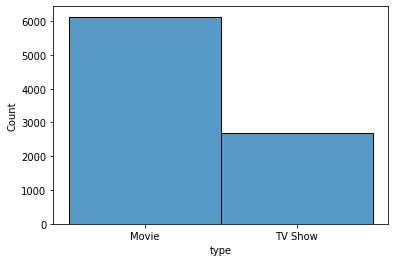

In [87]:
sns.histplot(tips['type'])

In [90]:
tips["director"].unique()

array(['Kirsten Johnson', nan, 'Julien Leclercq', ..., 'Majid Al Ansari',
       'Peter Hewitt', 'Mozez Singh'], dtype=object)

In [92]:
tips["director"].nunique()

4528

In [93]:
tips["director"].value_counts()

Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: director, Length: 4528, dtype: int64

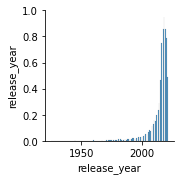

In [99]:
sns.pairplot(data=tips)

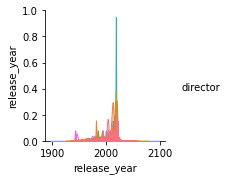

In [101]:
sns.pairplot(data=tips,hue="director")

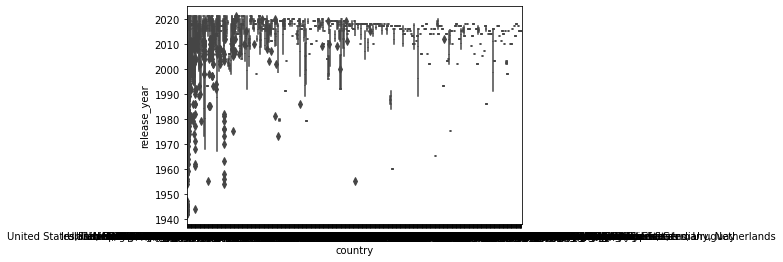

In [105]:
sns.boxplot(data=tips,
           x="country",
           y="release_year")

In [106]:
tips.corr()

,release_year
release_year,1.0


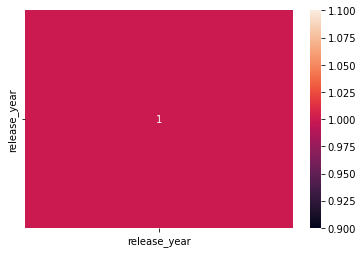

In [108]:
sns.heatmap(tips.corr(),annot=True)

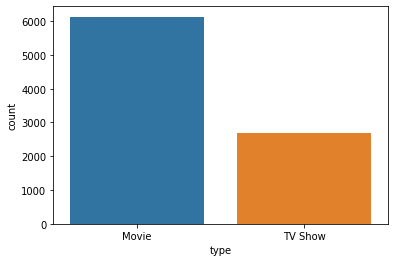

In [112]:
sns.countplot(data=tips,
             x="type")

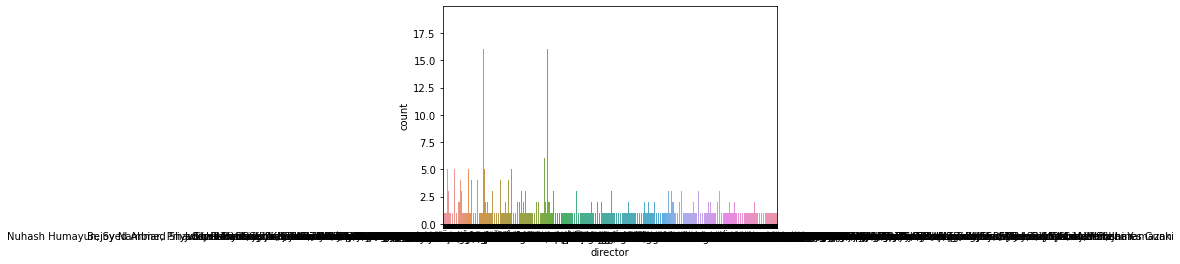

In [123]:
sns.countplot(data=tips,
             x="director")